## Microsam via Pixi environment example

### How to Use Pixi Environment in VS Code Notebooks

**Important:** Make sure you've registered the pixi environment as a Jupyter kernel first:

1. Navigate to your pixi environment folder (e.g., `pixi/microsam_cellpose3/`)

2. If you haven't created the pixi environment run `pixi install` on the command line:
```bash
pixi install
```

3. To register the environment (so VS Code can see it) run:
```bash
pixi run python -m ipykernel install --user --name=microsam_cellpose3 --display-name "Pixi (microsam_cellpose3)"
```

**Note:** After registering a new environment, you may need to restart VS Code for the environment to appear in the kernel selector.

4. Because microsam relies on cuda you may have to start vscode (or jupyter notebook) from a the pixi shell.  Navigate to your pixi folder then type 
```bash
pixi shell
```
then navigate to the tutorial folder and start vscode (or jupyter notebook). 
```
code .
```

5. In VS Code, click the kernel selector (top right of notebook)
6. Choose "Select Another Kernel" → "Jupyter Kernel" → "Pixi (microsam)"

If the imports below work without errors, your pixi environment is properly configured!

In [1]:
import micro_sam
print("microsam version:", micro_sam.__version__)

import torch
import numpy as np

print("Torch version:", torch.__version__)
print("NumPy version:", np.__version__)

print("CUDA available:", torch.cuda.is_available())
if torch.cuda.is_available():
    print("GPU name:", torch.cuda.get_device_name(0))

print("cuDNN available:", torch.backends.cudnn.is_available())
print("cuDNN version:", torch.backends.cudnn.version())

microsam version: 1.6.2
Torch version: 2.8.0
NumPy version: 2.3.5
CUDA available: True
GPU name: NVIDIA GeForce RTX 3090
cuDNN available: True
cuDNN version: 91002
Torch version: 2.8.0
NumPy version: 2.3.5
CUDA available: True
GPU name: NVIDIA GeForce RTX 3090
cuDNN available: True
cuDNN version: 91002


## Other imports

Now import microsam, matplotlib, and tnia plotting helpers.

In [2]:
from micro_sam.automatic_segmentation import get_predictor_and_segmenter, automatic_instance_segmentation
from skimage.io import imread
import matplotlib.pyplot as plt
# Import visualization helper
from tnia.plotting.plt_helper import mask_overlay

c:\Users\bnort\work\ImageJ2022\tnia\notebooks-and-napari-widgets-for-dl\pixi\microsam_cellpose3\.pixi\envs\default\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Get microsam predictor and segmenter

In [3]:
tile_shape = None #(384, 384)
halo = (64, 64)
model_type = "vit_b_lm"

device = "cuda" if torch.cuda.is_available() else "cpu" # the device/GPU used for training
# Step 1: Get the 'predictor' and 'segmenter' to perform automatic instance segmentation.
predictor, segmenter = get_predictor_and_segmenter(
    model_type=model_type, # choice of the Segment Anything model
    #checkpoint=best_checkpoint,  # overwrite to pass your own finetuned model.
    device=device,  # the device to run the model inference.
    is_tiled = False #(tile_shape is not None),  # whether the model is tiled or not.
)

## Open test images

In [ ]:

image_path = r"D:\images\tnia-python-images\imagesc\2025_11_21_stellate\MAX_C6M4_big.lif - TileScan_003_Merging001_Crop001-1.tif"

image = imread(image_path)
ground_truth = imread(label_path)

print(f"Image shape: {image.shape}")
print(f"Ground truth shape: {ground_truth.shape}")

Image shape: (1536, 2040, 3)
Ground truth shape: (1536, 2040)


## Call microsam automatic instance segmentation

In [5]:

# Step 2: Get the instance segmentation for the given image.
prediction = automatic_instance_segmentation(
    predictor=predictor,  # the predictor for the Segment Anything model.
    segmenter=segmenter,  # the segmenter class responsible for generating predictions.
    input_path=image,
    ndim=2,
    #tile_shape=tile_shape,
    #halo=halo,
)


Initialize instance segmentation with decoder: 100%|██████████| 1/1 [00:00<00:00,  3.95it/s]



## Plotting

Plot ground truth and microsam prediction as overlays on original image

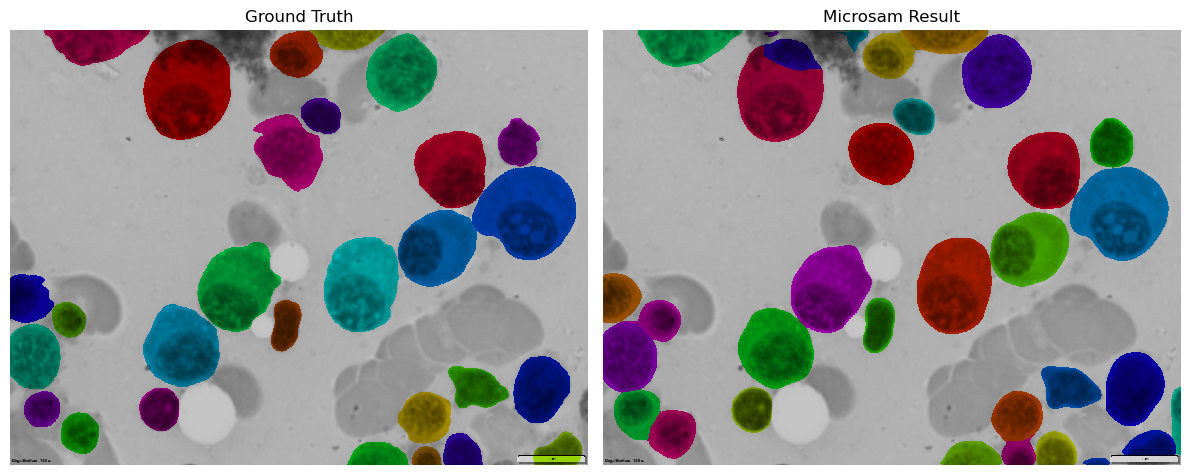

In [6]:
# Create overlays
ground_truth_overlay = mask_overlay(image, ground_truth)
result_overlay = mask_overlay(image, prediction)

# Create comparison plot
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].imshow(ground_truth_overlay)
axes[0].set_title('Ground Truth')
axes[0].axis('off')

axes[1].imshow(result_overlay)
axes[1].set_title('Microsam Result')
axes[1].axis('off')

plt.tight_layout()
plt.show()

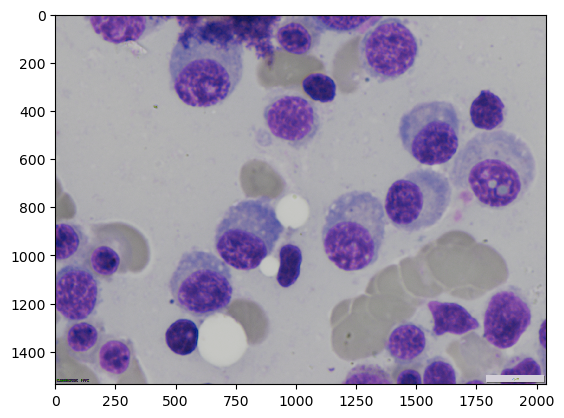

In [7]:
plt.imshow(image)